In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
data = fits.open('data_wht_isis/r2701004_red_arc.fit')[1]

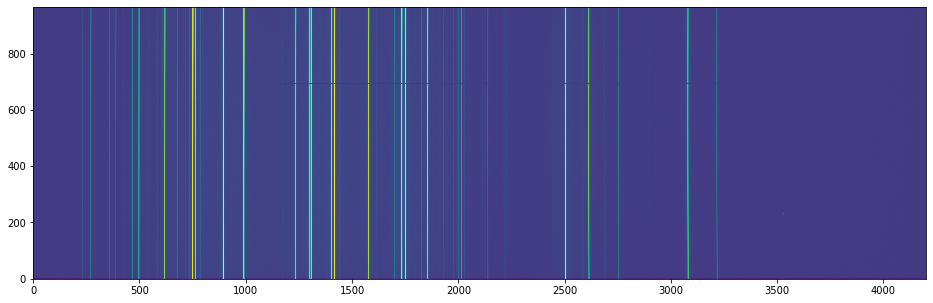

In [3]:
plt.figure(1, figsize=(16,5))
plt.imshow(np.log(data.data.T), aspect='auto', origin='lower')

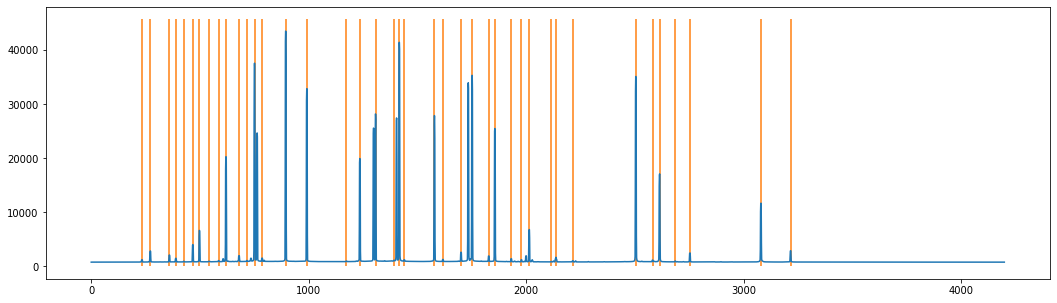

In [4]:
spectrum = np.median(data.data.T, axis=0)

peaks, _ = find_peaks(spectrum, prominence=80, distance=20, threshold=None)

peaks_refined = refine_peaks(spectrum, peaks, window_width=3)
plt.figure(figsize=(18,5))
plt.plot(spectrum)
plt.vlines(peaks_refined,
              0,
              1.05*spectrum.max(),
              colors='C1')

In [5]:
c = Calibrator(peaks_refined,
               min_wavelength=7000.,
               max_wavelength=10500.,
               num_pix=len(spectrum))

c.use_plotly()
c.use_matplotlib()

c.set_fit_constraints(ransac_thresh=3, range_tolerance=750., fittype='poly')
c.add_atlas(["Ne", "Ar", "Cu"])

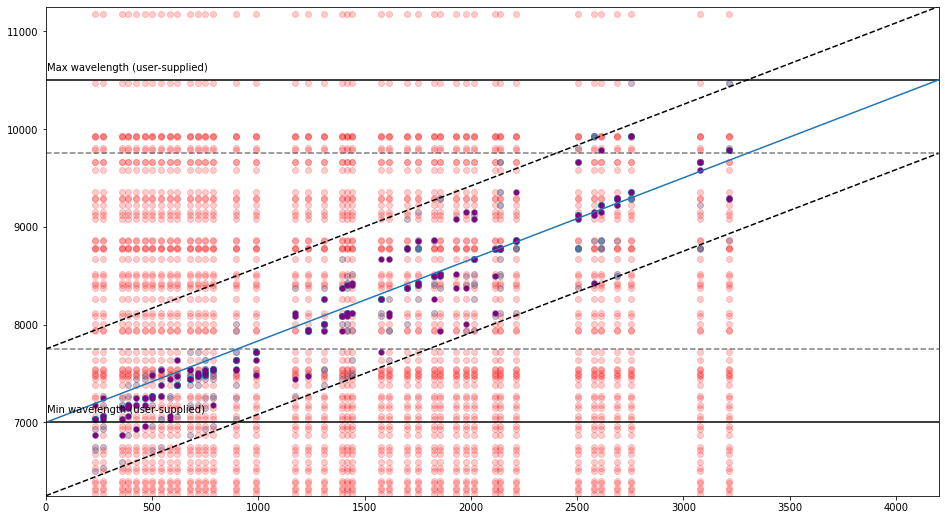

In [6]:
c.plot_search_space()


Peak at: 7032.432415715895 A
- matched to 7032.41 A
Peak at: 7067.231333994919 A
- matched to 7067.218 A
Peak at: 7146.987560614887 A
- matched to 7147.04 A
Peak at: 7173.9311822292375 A
- matched to 7173.94 A
Peak at: 7206.954699529948 A
Peak at: 7245.261772883618 A
- matched to 7245.12 A
Peak at: 7272.930353947151 A
- matched to 7272.94 A
Peak at: 7311.947970311132 A
Peak at: 7353.726207798203 A
Peak at: 7383.993474826979 A
- matched to 7383.98 A
Peak at: 7439.043864879025 A
- matched to 7438.9 A
Peak at: 7471.712462192016 A
- matched to 7472.44 A
Peak at: 7503.967573480182 A
- matched to 7503.87 A
Peak at: 7535.8051088917655 A
- matched to 7535.77 A
Peak at: 7635.294178754804 A
- matched to 7635.11 A
Peak at: 7723.9872154801715 A
- matched to 7723.76 A
Peak at: 7891.142847986505 A
Peak at: 7948.2560855977335 A
- matched to 7948.18 A
Peak at: 8014.818504609098 A
Peak at: 8092.776822645722 A
- matched to 8092.63 A
Peak at: 8115.185405568463 A
- matched to 8115.31 A
Peak at: 8136.5199

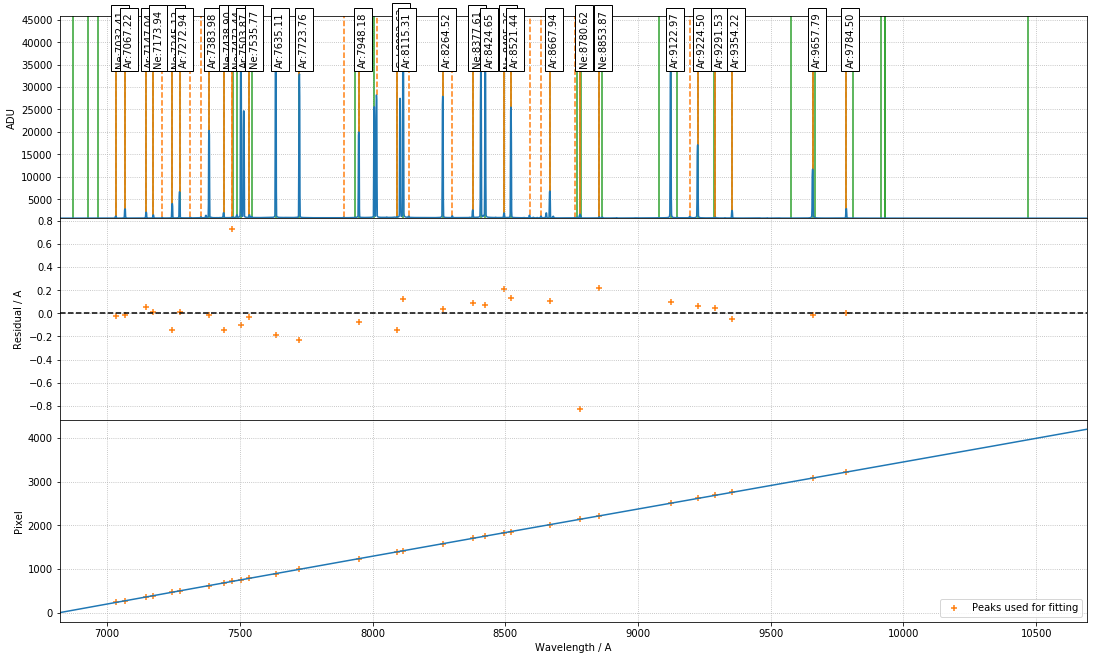

Stdev error: 0.22738172056008676 A
Peaks utilisation rate: 73.17073170731707%


In [7]:
final_tolerance = 2.

best_p, rms, residual, peak_utilisation = c.fit(max_tries=10000)
best_p, x_fit, y_fit, residual, peak_utilisation = c.match_peaks_to_atlas(best_p, tolerance=5.)
best_p, x_fit, y_fit, residual, peak_utilisation = c.match_peaks_to_atlas(best_p, tolerance=final_tolerance)

c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False, tolerance=final_tolerance, renderer='notebook')

fit_diff = c.polyval(x_fit, best_p) - y_fit

rms = np.sqrt(np.sum(fit_diff**2 / len(x_fit)))

print("Stdev error: {} A".format(fit_diff.std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))